In [1]:
import batterycharger as bc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

plt.style.use('seaborn')

#save again

In [2]:
ichargermax=6.5
padaptor=60
psystem=5
soc=0.1

In [3]:
soclist = np.arange(0,1,0.01) #[0.01, 0.5, 0.95]
syspwr = np.arange(0,50,5)
adptr = [45,60,90]
imx = [6,7,8,9]

In [4]:
data = [bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=s),psystem=psystem, imax=ichargermax).charger_state for s in soclist]
frame=pd.DataFrame(data,index=soclist,columns=['Pout','Ibat','Vsys','Iout'])
frame.index.name='soc'

data2 = [bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=soc),psystem=p, imax=ichargermax).charger_state for p in syspwr]
frame2=pd.DataFrame(data2,index=syspwr,columns=['Pout','Ibat','Vsys','Iout'])
frame2.index.name='psys'


In [5]:
frame2

,Pout,Ibat,Vsys,Iout
psys,,,,
0,44.791616,5.405405,8.286449,5.405405
5,49.791616,5.405405,8.286449,6.008800
10,53.711676,5.289835,8.263335,6.500000
15,52.888332,4.656493,8.136666,6.500000
20,52.037215,4.001788,8.005725,6.500000
25,51.155310,3.323399,7.870048,6.500000
30,50.239011,2.618554,7.729079,6.500000
35,49.283951,1.883893,7.582146,6.500000
40,48.284751,1.115277,7.428423,6.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f43fc3f60>,
      dtype=object)

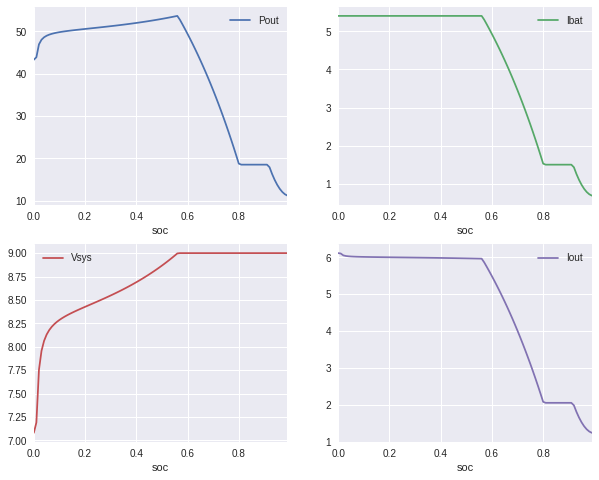

In [6]:
frame.plot(subplots=True, layout=(2,2),figsize=(10,8),sharex=False,use_index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f43fa0208>,
      dtype=object)

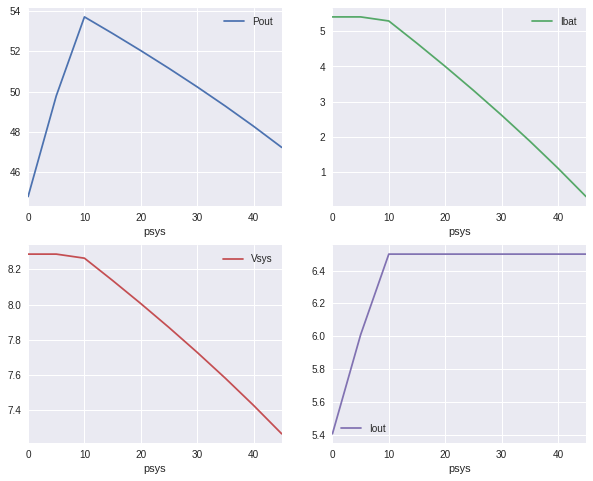

In [7]:
frame2.plot(subplots=True, layout=(2,2),figsize=(10,8),sharex=False,use_index=True)

In [8]:
data3=bc.batterystate_vs_t(bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=soc),psystem=psystem, imax=ichargermax))
frame3=pd.DataFrame(np.array(data3[1:]).T,index=data3[0],columns=['soc','pout','vbat','vsys','iout','icharge'])
frame3.index.name='time(hr)'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f41c023c8>,
      dtype=object)

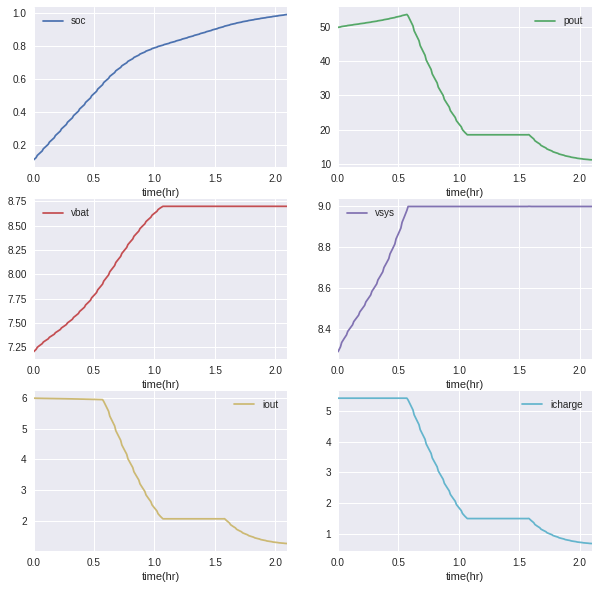

In [9]:
frame3.plot(subplots=True, layout=(3,2),figsize=(10,10),sharex=False,use_index=True)

In [10]:
data4=[]
idx_array=[]
for s in syspwr:
    for a in adptr:
        idx_array.append([a,s])
        datacol=[]
        for i in imx:
            datacol.append(bc.chargetime(padaptor=a,psystem=s,imax=i))
        data4.append(datacol)

In [11]:
def data4a():
    data=[]
    idx_array=[]
    for s in syspwr:
        for a in adptr:
            idx_array.append([a,s])
            datacol=[]
            for i in imx:
                datacol.append(bc.chargetime(padaptor=a,psystem=s,imax=i))
            data.append(datacol)
    return data

In [12]:
#%prun duh=data4a()

In [13]:
idx=pd.MultiIndex.from_product([syspwr,adptr],names=['Syspwr','Padaptor'])

In [14]:
frame4=pd.DataFrame(data4,index=idx,columns=imx)

In [15]:
frame4

6     7     8     9
Syspwr Padaptor                        
0      45        2.30  2.30  2.30  2.30
       60        2.22  2.22  2.22  2.22
       90        2.22  2.22  2.22  2.22
5      45        2.42  2.42  2.42  2.42
       60        2.22  2.22  2.22  2.22
       90        2.22  2.22  2.22  2.22
10     45        2.58  2.58  2.58  2.58
       60        2.30  2.25  2.25  2.25
       90        2.30  2.22  2.22  2.22
15     45        2.82  2.82  2.82  2.82
       60        2.43  2.33  2.33  2.33
       90        2.43  2.23  2.22  2.22
20     45        3.18  3.18  3.18  3.18
       60        2.62  2.47  2.47  2.47
       90        2.62  2.33  2.22  2.22
25     45        3.80  3.80  3.80  3.80
       60        2.92  2.65  2.63  2.63
       90        2.92  2.48  2.27  2.22
30     45        5.20  5.20  5.20  5.20
       60        3.43  2.92  2.90  2.90
       90        3.43  2.72  2.38  2.22
35     45        9.50  9.45  9.45  9.45
       60        4.52  3.37  3.33  3.33
       90        4.52  3.08  2.57  2.30
40     45        9.98  9.98  9.98  9.98
       60        9.98  4.20  4.08  4.07
       90        9.98  3.78  2.83  2.43
45     45        9.98  9.98  9.98  9.98
       60        9.98  9.98  5.95  5.93
       90        9.98  9.98  3.32  2.65

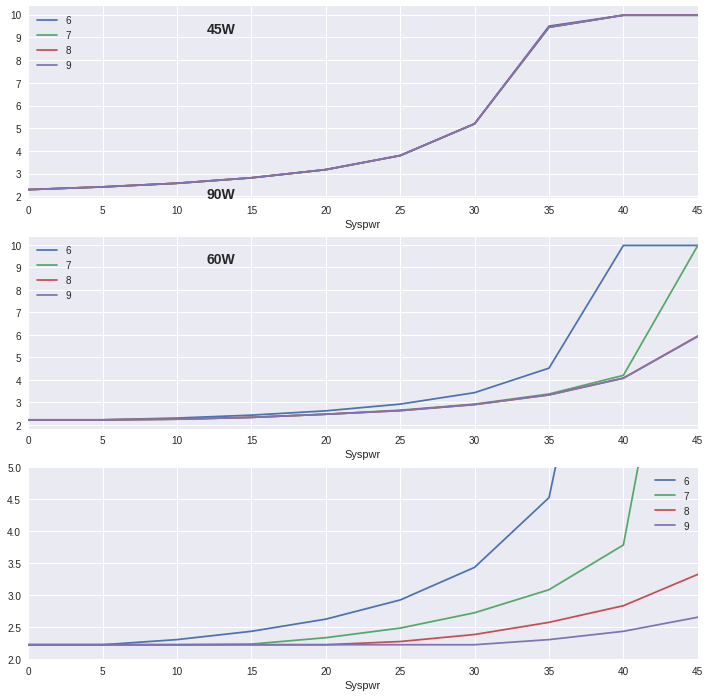

In [16]:
f, a = plt.subplots(3,1)
frame4.xs(45,level=1).plot(ax=a[0],figsize=(12,12))
frame4.xs(60,level=1).plot(ax=a[1])
frame4.xs(90,level=1).plot(ax=a[2])
a[2].set_ylim([2,5])
for i in range(len(adptr)):
    text=str(adptr[i])+'W'
    a[i].text(12,9.2,text,fontsize=14,fontweight='bold')
plt.show()

In [17]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

In [18]:
help(pd.plotting)

Help on package pandas.plotting in pandas:

NAME
    pandas.plotting - Plotting public API.

DESCRIPTION
    Authors of third-party plotting backends should implement a module with a
    public ``plot(data, kind, **kwargs)``. The parameter `data` will contain
    the data structure and can be a `Series` or a `DataFrame`. For example,
    for ``df.plot()`` the parameter `data` will contain the DataFrame `df`.
    In some cases, the data structure is transformed before being sent to
    the backend (see PlotAccessor.__call__ in pandas/plotting/_core.py for
    the exact transformations).
    
    The parameter `kind` will be one of:
    
    - line
    - bar
    - barh
    - box
    - hist
    - kde
    - area
    - pie
    - scatter
    - hexbin
    
    See the pandas API reference for documentation on each kind of plot.
    
    Any other keyword argument is currently assumed to be backend specific,
    but some parameters may be unified and added to the signature in the
    future (e